In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
loc = '/content/drive/My Drive/dataset'

In [ ]:
import os
label = []
for i in os.listdir(loc):
  if(i.split('.')[0]== 'cat'):
    label.append(0)
  else:
    label.append(1)

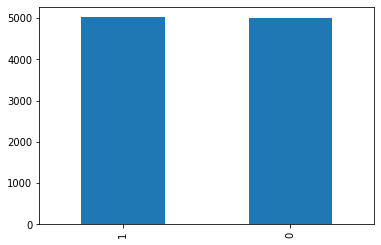

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
label = pd.DataFrame(label)
label[0].value_counts().plot.bar()


In [ ]:
label.shape

(10028, 1)

In [ ]:
from tqdm import tqdm
features = []
for i in tqdm(os.listdir(loc)):
  path = os.path.join(loc,i)
  f = cv2.imread(path)
  fr = cv2.resize(f,(70,70))
  features.append(fr)

100%|██████████| 10028/10028 [01:15<00:00, 131.98it/s]


In [ ]:
 import numpy as np
X = np.array(features)
Y = np.array(label)

In [ ]:
X.shape

(10028, 70, 70, 3)

In [ ]:
Xt = X.reshape(10028,14700)

In [ ]:
import pandas as pd
pd.DataFrame(Xt).to_csv('cat_dog.csv')

In [ ]:
Xt = Xt/Xt.max()

In [ ]:
Xt.shape[1]

14700

In [ ]:
import keras
from keras import layers
from keras.utils import to_categorical


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(200, activation = 'relu' , input_dim = Xt.shape[1]))
model.add(layers.Dense(100 , activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [ ]:
Yt = to_categorical(Y)

In [ ]:
Yt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
pd.DataFrame(Yt).to_csv('cat_dog_labels.csv')


In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 200)               2940200   
_________________________________________________________________
dense_46 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 202       
Total params: 2,960,502
Trainable params: 2,960,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,test_size=0.1)

In [ ]:
xtrain.shape

(9025, 14700)

In [ ]:
ytrain.shape

(9025, 2)

In [ ]:
model.fit(xtrain,ytrain,epochs=30)

Epoch 1/30
9025/9025 [==============================] - 2s 207us/step - loss: 0.6908 - accuracy: 0.5532
Epoch 2/30
9025/9025 [==============================] - 2s 200us/step - loss: 0.6678 - accuracy: 0.5905
Epoch 3/30
9025/9025 [==============================] - 2s 201us/step - loss: 0.6671 - accuracy: 0.5893
Epoch 4/30
9025/9025 [==============================] - 2s 203us/step - loss: 0.6541 - accuracy: 0.6152
Epoch 5/30
9025/9025 [==============================] - 2s 203us/step - loss: 0.6518 - accuracy: 0.6146
Epoch 6/30
9025/9025 [==============================] - 2s 200us/step - loss: 0.6401 - accuracy: 0.6317
Epoch 7/30
9025/9025 [==============================] - 2s 201us/step - loss: 0.6387 - accuracy: 0.6356
Epoch 8/30
9025/9025 [==============================] - 2s 204us/step - loss: 0.6383 - accuracy: 0.6306
Epoch 9/30
9025/9025 [==============================] - 2s 200us/step - loss: 0.6248 - accuracy: 0.6474
Epoch 10/30
9025/9025 [==============================] - 2s 200u

In [ ]:
model.evaluate(xtest,ytest)

1003/1003 [==============================] - 0s 167us/step


[0.9925799842845883, 0.5503489375114441]

In [ ]:
model.save('cat_dog_classifier.h5')